# Projeto 2 - Fundamentos de Data Science 1 - Titanic

## Identificação
**Aluno**: Vinicius Porto Lima   
**Email**: viniciusmaximus@gmail.com   
**Curso**: Fundamentos de Data Science 1

## Introdução

O tragédia do naufrágio do Titanic, ocorrida em 15 de abril de 1912, vitimou 1502 de 2224 passageiros. O alto nível de mortalidade do acidente se deve à insuficiência de botes salva-vidas no navio, que resultou na priorização da sobrevivência de grupos de pessoas, tais como mulheres, crianças, e passageiros de classes superiores.

Nesta análise, responderei alguns questionamentos derivados do conjunto de dados disponibilizado no desafio [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic), do [Kaggle](https://www.kaggle.com/). Não será desenvolvido um modelo preditivo de *machine learning*, logo, somente farei uso do conjunto de dados de treinamento disponibilizado no desafio, que possui a informação de categoria que define se o passageiro sobreviveu ou não sobreviveu. 

Contudo, farei uma análise estatística básica, com o apoio visual, para responder aos questionamentos enumerados em item específico deste relatório. Como consequência, **os resultados aqui dispostos não são definitivos**. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# dataframe com dados para treinamento do modelo (possui a flag de sobrevivência)
df_train = pd.read_csv('train.csv', index_col=0)

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas

- **Passageiros de primeira classe, mulheres e crianças obtiveram a maior chance de sobreviver?**  
   É esperado que alguns grupos de passageiros sejam priorizados para o uso dos botes salva-vidas. Estes grupos são crianças, mulheres e passageiros de primeira classe. Será verificado estatisticamente se essa espectativa se consolida no conjunto de dados analisado.


- **No caso de crianças, a classe do passageiro afetou na probabilidade de sobrevivência?**  
   Quando se trata de crianças, imagina-se que não tenha havido priorização por classe.
   
   
- **Mulheres casadas possuem mais chances de sobreviver do que mulheres solteiras?**  
   Mulheres casadas podem dispor de apoio do marido ou tinham filhos, o que poderia apoiar na sua priorização no embarque em botes salvavidas. 
   
   
- **Passageiros que viajavam acompanhados possuem mais chances de sobreviver do que passageiros que viajavam sozinhos?**  
   Seguindo na mesma linha do questionamento anterior, pretende-se verificar se a presença de familiares apoiou na sobrevivência do passageiro.
   
   
- **A diferença na taxa de sobrevivência dentre homens e mulheres é menor na primeira classe do que nas duas outras classes?**  
   Considerando que a passageiros de classe superior e mulheres são grupos priorizados, será verificado se a diferença da taxa de sobrevivência entre homens e mulheres é inferior na primeira classe quando comparada com as demais classes.
   
   
- **O porto de embarque afetou na probabilidade de sobrevivência do passageiro?**  
   O porto de embarque aparenta não estar relacionado com a probabilidade de sobrevivência de um passageiro. Será verificado se há alguma relação.

## Análise dos dados

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


O dataframe é composto por 11 colunas, uma vez que a coluna PassengerId foi usada como índice na leitura do arquivo CSV. As colunas são:  
- Survived: se o passageiro sobreviveu ou não sobreviveu (0, se não sobreviveu, e 1, se sobreviveu)
- Pclass: a classe do passageiro (1, 2 ou 3 para 1ª, 2ª ou 3ª classe)
- Name: nome do passageiro
- Sex: o sexo do passageiro
- Age: a idade do passageiro
- SibSp: quantidade de passageiros embarcados que possuem relação de irmão ou cônjuge
- Parch: quantidade de passageiros embarcados que possuem relação de pai ou filho
- Ticket: número do *ticket*
- Fare: custo da passagem
- Cabin: número da cabine
- Embarked: porto onde o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Da análise das variáveis numéricas, identifica-se que a variável *Age* possui 177 valores nulos. Essa ausência de dados deverá ser tratada adequadamente, uma vez que esta variável se refere a um atributo que define grupo com maior probabilidade de sobrevivência.

Cabe mencionar que, apesar de numéricos, *Survived* e *Pclass* são variáveis do tipo qualitativas, que subdividem o conjunto de dados em categorias.

In [5]:
# análise de variáveis qualitativas
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beesley, Mr. Lawrence",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Já na análise das variáveis qualitativas, ou categóricas, identificou-se que:
- *Name* possui um valor único para cada amostra. Nesta forma, o dado não auxiliará na resposta de nenhum questionamento
- *Ticket* tem um elevado índice de valores únicos. Ademais, não parece apoiar em nenhuma categorização de passageiros
- *Cabin* está nula na maioria das amostras. A ausência de valores pode comprometer o sua utilização

## Limpeza dos dados

Considerando a análise dos dados realizada, opta-se pelas seguintes modificações no *dataframe*:

1. Conversão da variável Sex em número
2. Conversão da variável Embarked em número
3. Criação do campo Title derivado de Name
4. Remoção das variáveis Cabin, Ticket e Name
5. Criação do campo Family
6. Remoção das amostras onde Age é nulo
7. Criação do campo AgeGroup derivado de Age

### Conversão da variável Sex em número

A variável Sex será convertida para numéro. Assim, será possível correlacionar com a variável Survived.

In [6]:
map_sex = {'male': 0, 'female': 1}
df_train['Sex'] = df_train['Sex'].map(map_sex).astype(int)

df_train['Sex'].unique()

array([0, 1], dtype=int64)

### Conversão da variável Embarked em número
Com o mesmo intuito do caso anterior, a variável Embarked também será convertida para número e, assim, estabelecer a correlação com Survived.

In [7]:
# Embarked tem 2 valores nulos. Para esta análise, eles serão desconsiderados
df_train.dropna(subset=['Embarked'], inplace=True)

map_embarked = {'C': 0, 'Q': 1, 'S': 2}
df_train['Embarked'] = df_train['Embarked'].map(map_embarked).astype(int)

df_train['Embarked'].unique()

array([2, 0, 1], dtype=int64)

### Criação do campo Title derivado de Name

O campo Name não possui correlação alguma com o campo Survived. Porém, se considerarmos o título do passageiro, podemos obter detalhes, tais como o status civil do passageiro, quando do sexo feminino, bem como se o passageiro pertencia à nobreza.

Obs.: A extração dos pronomes de tratamento foi feita no notebook de exemplo do [desafio do Titanic](https://www.kaggle.com/startupsci/titanic-data-science-solutions). O método utilizado servirá como base para esse tratamento.

In [8]:
df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Da extração do título, chegamos a um conjunto de 17 títulos distintos. O problema é que alguns desses títulos podem ser agrupados, por serem similares ou por representarem um conjunto muito pequeno do espaço amostral, conforme demonstrado no próximo passo.

In [9]:
df_train['Title'].value_counts(normalize=True) * 100

Mr          58.155231
Miss        20.359955
Mrs         13.948256
Master       4.499438
Dr           0.787402
Rev          0.674916
Col          0.224972
Major        0.224972
Mlle         0.224972
Mme          0.112486
Countess     0.112486
Ms           0.112486
Sir          0.112486
Don          0.112486
Lady         0.112486
Capt         0.112486
Jonkheer     0.112486
Name: Title, dtype: float64

É possível verificar que aproximadamente 97% das amostras são representadas pelos títulos Mr, Miss, Mrs e Master. Amostras como "Don" ou "Jonkheer" representam somente 0,1% das amostras, que equivale a somente 1 amostra. Ademais, títulos como "Ms", "Mlle" e Mme são sinônimos de outros dois mais frequêntes, coforme explicação:
- Mme.: é uma abreviação do termo francês Madame, e equivale a Mrs (mulher casada). 
- Mlle.: é uma abreviação do termo francês Mademoiselle, e equivale a Miss (mulher solteira). 
- Ms.: este caso se aplica para quando a mulher não deseja ser identificada como casada ou solteira. Como se trata de somente uma amostra, onde não há registro de cônjuge, vou considerar como Miss.  

Neste caso, os 3 títulos serão devidamente agrupados nos respectivos títulos mais frequentes, e todos os demais serão agrupados na denominação "Outros".

In [10]:
df_train['Title'] = df_train['Title'].replace(
    ['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Lady', 'Capt', 'Countess','Jonkheer'], 
    'Outros'
)

df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Outros'], dtype=object)

In [11]:
df_train.describe(include=['O'])

,Name,Ticket,Cabin,Title
count,889,889,202,889
unique,889,680,146,5
top,"Beesley, Mr. Lawrence",CA. 2343,G6,Mr
freq,1,7,4,517


Conforme verificado acima, o novo atributo Title não possui valores nulos. Vamos, por fim, convertê-los para categorias numéricas.

In [12]:
map_title = {'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Outros': 5}

df_train['Title'] = df_train['Title'].map(map_title).astype(int)

df_train['Title'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

### Remoção das variáveis Cabin, Ticket e Name
Considerando o conjunto de questionamentos levantados, e que: 
- Name e Ticket possuem um elevado índice de valores únicos; e
- Cabin é nula para a maioria das amostras 

opta-se por desconsiderar essas variáveis e removê-las do conjunto de dados.

In [13]:
df_train = df_train.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

### Criação do campo Family
Para simplificar a análise, as variáveis SibSp e Parch serão somadas para identificar se o passageiro viajava com a família, ou se viajava sozinho. O objetivo é identificar se passageiros acompanhados por família possuíam mais chances de sobreviver que passageiros que viajaram sozinhos.

A variável Family assumirá 2 valores: 1, quando a soma de SibSp e Parch for maior que 0; e 0, caso contrário.

In [14]:
df_train['Family'] = np.where(df_train['SibSp'] + df_train['Parch'] > 0, 1, 0)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2,1,1
2,1,1,1,38.0,1,0,71.2833,0,2,1
3,1,3,1,26.0,0,0,7.9250,2,3,0
4,1,1,1,35.0,1,0,53.1000,2,2,1
5,0,3,0,35.0,0,0,8.0500,2,1,0


### Remoção das amostras onde Age é nulo
No notebook do desafio do Titanic, é feito um enriquecimento de dados da variável Age, considerando a variação do valor em determinadas categorias de passageiros. Considerando o escopo desta análise, no entanto, opta-se por desconsiderar as amostras com Age nulo, totalizando num montante de 177 amostras.

In [15]:
df_train.dropna(subset=['Age'], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null int32
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null int32
Title       712 non-null int32
Family      712 non-null int32
dtypes: float64(2), int32(4), int64(4)
memory usage: 50.1 KB


### Criação do campo AgeGroup derivado de Age
A variável AgeGroup se refere a faixas de idades da variável Age. Serão consideradas 4 faixas de idade: criança, adolescente, adulto e idoso, distribuídas conforme disposto abaixo:
- criança: até 12 anos
- adolescente: de 12 até 18 anos
- adulto: de 18 até 60 anos
- idoso: a partir de 60 anos

Para representar os valores, serão utilizados os número 1, 2, 3 e 4 para criança, adolescente, adulto e idoso, respectivamente.

In [16]:
df_train['AgeGroup'] = pd.cut(df_train['Age'], [0, 12, 18, 60, df_train['Age'].max()])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,AgeGroup
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2,1,1,"(18.0, 60.0]"
2,1,1,1,38.0,1,0,71.2833,0,2,1,"(18.0, 60.0]"
3,1,3,1,26.0,0,0,7.9250,2,3,0,"(18.0, 60.0]"
4,1,1,1,35.0,1,0,53.1000,2,2,1,"(18.0, 60.0]"
5,0,3,0,35.0,0,0,8.0500,2,1,0,"(18.0, 60.0]"


In [17]:
# A função cut do pandas cria faixas de categoria do tipo pandas.Categorical.
# Para converter as 4 faixas nos respectivos valores numéricos, me baseei no seguinte tópico do StackOverflow
# https://stackoverflow.com/questions/51311831/how-to-convert-categorical-data-to-numerical-data
df_train['AgeGroup'] = df_train['AgeGroup'].cat.codes + 1
df_train['AgeGroup'].unique()

array([3, 1, 2, 4], dtype=int64)

### Salvando o arquivo com os dados tratados

In [18]:
df_train.to_csv('train_tratado.csv', index=False)

## Análise
Com os dados devidamente tratados, vamos analisar o conjunto disponível para tentar responder cada um dos questionamentos mencionados anteriormente, à saber:
- Passageiros de primeira classe, mulheres e crianças obtiveram a maior chance de sobreviver?
- No caso de crianças, a classe do passageiro afetou na probabilidade de sobrevivência?
- Mulheres casadas possuem mais chances de sobreviver do que mulheres solteiras?
- Passageiros que viajavam acompanhados possuem mais chances de sobreviver do que passageiros que viajavam sozinhos?
- A diferença na taxa de sobrevivência dentre homens e mulheres é menor na primeira classe do que nas duas outras classes?
- O porto de embarque afetou na probabilidade de sobrevivência do passageiro?

Primeiramente, vamos carregar os dados novamente no notebook, de forma a garantir um ponto intermediário de retorno.

In [19]:
df_train = pd.read_csv('train_tratado.csv')
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,AgeGroup
0,0,3,0,22.0,1,0,7.2500,2,1,1,3
1,1,1,1,38.0,1,0,71.2833,0,2,1,3
2,1,3,1,26.0,0,0,7.9250,2,3,0,3
3,1,1,1,35.0,1,0,53.1000,2,2,1,3
4,0,3,0,35.0,0,0,8.0500,2,1,0,3


### Funções de apoio
As funções abaixo servirão de apoio nas análise seguintes:

In [20]:
def groupby_mean_bar_plot(dataframe, groupby_vars, x_var_name, **kwargs):
    """
    Função que gera um gráfico de barras considerando a média de uma variável resultante do agrupamento
    de outras variáveis de um pandas.DataFrame
    
    Uso:
        groupby_mean_bar_plot(pandas.DataFrame, list(), str, x_labels=list(), title=str)
    
    Argumentos:
        dataframe:    Objeto pandas.DataFrame
        groupby_vars: list com os nomes das colunas para o groupby 
        x_var_name:   nome da coluna para o calculo da média
        x_labels:     labels a serem utilizadas no eixo X do gráfico
        title:        título do gráfico
    """
    axes = dataframe.groupby(groupby_vars).mean()[x_var_name].plot(kind='bar', grid=True)
    if 'x_labels' in kwargs.keys():
        axes.set_xticklabels(kwargs['x_labels'])
    if 'title' in kwargs.keys():
        axes.set_title(kwargs['title'])

def series_pie_plot(series, **kwargs):
    """
    Função que gera um gráfico de pizza a partir de um objeto pandas.Series.
    
    Uso:
        series_pie_plot(pandas.Series, title=str, labels=list())
    
    Argumentos:
        series: Objeto pandas.Series
        title:  título do gráfico
        labels: list com os nomes a serem utilizados na legenda
        
    Referência:
        http://www.datasciencemadesimple.com/pie-chart-in-python-with-legends/
    """
    explode = (0.1,)*len(series)
    plt.pie(series, labels=series, explode=explode, autopct='%1.1f%%')
    
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    
    if 'labels' in kwargs.keys():
        plt.legend(kwargs['labels'],loc=4)
    
    plt.show()
    
def hist_analysis_grid(dataframe, var_name, col_name, row_name):    
    """
    Função que gera um grid de gráfico que gera um histograma para uma determinada variável para
    cada relação col_name x row_name. Permite que se avalie como uma variável se comporta na 
    sua distribuição de amostras entre seus valores únicos utilizando a combinação de mais
    duas outras variáveis.
    
    Uso:
        hist_analysis_grid(pandas.DataFrame, str, str, str)
    
    Argumentos:
        dataframe: Objeto pandas.DataFrame
        var_name:  nome da coluna para a qual será gerado os histogramas
        col_name:  nome da coluna que será a coluna da análise matricial de histogramas
        row_name:  nome da coluna que será a linha da análise matricial de histrogramas
    
    Referência:
        https://seaborn.pydata.org/tutorial/axis_grids.html
    """
    # calculado para manter somente um espaço entre as variáveis
    bins = len(dataframe[var_name].unique())*2 - 1
    
    grid = sns.FacetGrid(dataframe, col=col_name, row=row_name, height=3)
    grid.map(plt.hist, var_name, bins=bins)
    grid.add_legend();
    
def two_series_bar_plot (series, labels, **kwargs):
    """
    Função que gera dois gráficos de barra sobrepostos a partir de duas séries de dados.
    
    Uso:
        two_series_bar_plot(dict(key: list()), list(), title=str, xlabel=str, ylabel=str, loc=int)
    
    Argumentos:
        series: dicionário com duas chaves, cada uma representando uma série de dados disponibilizada 
                em objetos list(). A chave do dicionário será utilizada na legenda do gráfico
        labels: list contendo as labels a serem utilizadas no eixo X
        title:  título do gráfico
        xlabel: título do eixo X
        ylabel: título do eixo Y
        loc:    localização das legendas no gráfico (vide doc de matplotlib.pyplot)
    
    Referência:
        Codigo tirado do exemplo fornecido pelo instrutor Thiago, da Udacity
    """
    keys = list(series.keys())
    pos = np.arange(len(series[keys[0]])) # posições das barras
    tam = .35 # distancia das barras.
    loc = 4

    fig, ax = plt.subplots() # para plotar vários gráficos em uma mesma figura.
    # Ambos os plots seguem a mesma ideia, a posição da barra é dada pelo primeiro 
    # argumento:
    # - para a barra ficar a esquerda do centro do tick em x
    # + para a barra ficar a direita do centro do tick em x.
    plt1 = ax.bar(pos-tam/2, series[keys[0]], tam, color='blue', label=keys[0])
    plt2 = ax.bar(pos+tam/2, series[keys[1]], tam, color='red', label=keys[1])

    # Quando se usa axes você deve usar a axe criada para adicionar titulos e rótulos.
    if 'title' in kwargs.keys():
        ax.set_title(kwargs['title'])  
    if 'xlabel' in kwargs.keys():
        ax.set_xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs.keys():
        ax.set_ylabel(kwargs['ylabel'])
    
    # Define as posições dos ticks, pos é um array da seguinte forma [0, 1, 2]
    ax.set_xticks(pos) 
    # rotation faz o angulo do texto girar em graism e ha diz qual ponto deve ser 
    # alinhado o texto
    ax.set_xticklabels(labels, rotation=45, ha='right') 
    
    if 'loc' in kwargs.keys():
        loc = kwargs['loc']
        
    ax.legend(loc=loc); # legend faz os labels se tornarem labels de legendas na figura. 


### Correlação das variáveis com a probabilidade de sobrevivência

In [21]:
survived_corr = df_train.corr()['Survived']
survived_corr

Survived    1.000000
Pclass     -0.356462
Sex         0.536762
Age        -0.082446
SibSp      -0.015523
Parch       0.095265
Fare        0.266100
Embarked   -0.181979
Title       0.391611
Family      0.199741
AgeGroup   -0.130023
Name: Survived, dtype: float64

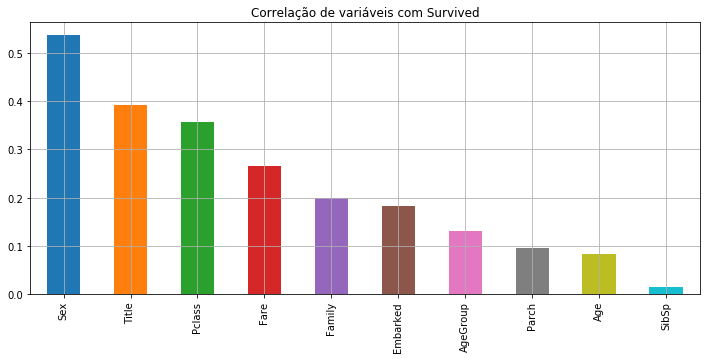

In [22]:
# transformar em valores absolutos para montar gráfico
abs_survived_corr = survived_corr.abs()
# remove Survived
abs_survived_corr.drop('Survived', inplace=True)
# ordena a série
abs_survived_corr.sort_values(ascending=False, inplace=True)

abs_survived_corr.plot(kind='bar', grid=True, figsize=(12,5), title='Correlação de variáveis com Survived');

Pelo resultado da análise de correlação das demais variáveis com a variável Survived, identificou-se que:
- Além do sexo (Sex), classe (Pclass), e idade (Age), outras variáveis como a taxa da passagem (Fare) e o porto onde embarcou (Embarked) possuem elevada correlação com a variável Survived;
- A variável criada Title tem elevada correlação com Survived, mas pode ser consequência da sua íntima correlação com Sex (uma vez que há títulos para mulheres e títulos para homens);
- O uso de faixas etárias aumentou a correlação entre a dimensão de idade e a variável Survived. Isso demonstra que há faixas etárias que foram efetivamente priorizadas. E como a correlação é negativa, mostra que há maior probabilidade de sobrevivência das faixas mais baixas, ou seja, crianças;
- Há correlação direta entre o passageiro ter viajado acompanhado de família (Family) e a variável Survived.

A partir dos dados de correlação, é possível identificar que, de fato, passageiros de primeira classe, mulheres e crianças tiveram maior probabilidade de sobreviver.

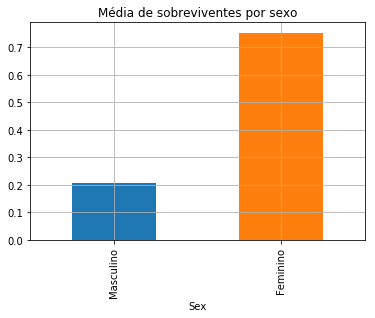

In [23]:
# Desenhar o gráfico da média de sobrevivência por Sex, AgeGroup e Pclass
groupby_mean_bar_plot(
    df_train, 
    ['Sex'], 
    'Survived', 
    x_labels=['Masculino','Feminino'], 
    title='Média de sobreviventes por sexo'
)

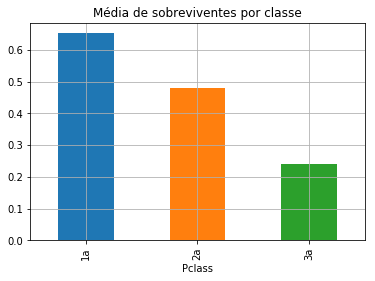

In [24]:
groupby_mean_bar_plot(
    df_train, 
    ['Pclass'], 
    'Survived', 
    x_labels=['1a', '2a', '3a'],
    title='Média de sobreviventes por classe'
)

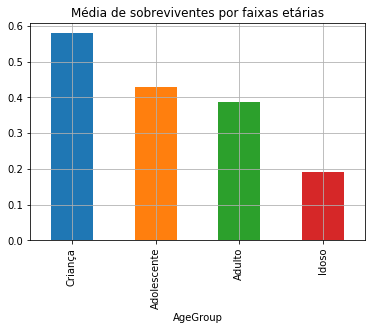

In [25]:
groupby_mean_bar_plot(
    df_train, 
    ['AgeGroup'], 
    'Survived', 
    x_labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'],
    title='Média de sobreviventes por faixas etárias'
)

### Priorização de crianças por classe
Para crianças, espera-se que não haja priorização por classe, gerando apenas uma pequena variação entre os valores encontrados. Para validar a existência dessa priorização considerando o espaço amostral, será analisada a variável Survived em função de Pclass para o AgeGroup 1 (criança).

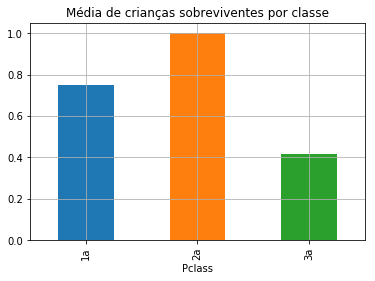

In [26]:
groupby_mean_bar_plot(
    df_train.query('AgeGroup == 1'), 
    ['Pclass'], 
    'Survived', 
    x_labels=['1a', '2a', '3a'],
    title='Média de crianças sobreviventes por classe'
)

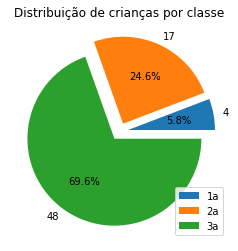

In [27]:
series_pie_plot(
    df_train.query('AgeGroup == 1').groupby(['Pclass']).count()['Survived'], 
    labels=['1a', '2a', '3a'],
    title='Distribuição de crianças por classe'
)

Da análise da média de sobrevivência de crianças pelas 3 classes, percebe-se que a 2ª classe teve 100% de sobreviventes, superior inclusive a 1ª classe, enquanto crianças da 3ª classe tiveram menos que 50% de chances de sobreviver. No entanto, como o espaço amostral dispõe de somente 4 crianças de 1ª classe, e pode esta ter sido vítima do acidente antes mesmo de alcançar algum bote salva-vidas, é possível inferir que houve priorização das crianças de 1ª e 2ª classe de maneira equivalente, em detrimento das crianças de 3ª classe.

Essa percepção é ratificada quando se diminui ainda mais a idade dos passageiros, considerando crianças de até 5 anos. Apesar do percentual de crianças passageiras da 3ª classe sobreviventes ser superior à análise de até 12 anos, é muito inferior ao percentual das duas classes superiores.

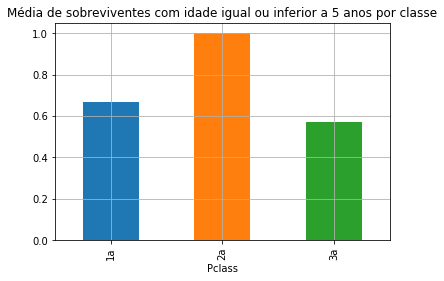

In [28]:
groupby_mean_bar_plot(
    df_train.query('Age <=5'), 
    ['Pclass'], 
    'Survived', 
    x_labels=['1a', '2a', '3a'],
    title='Média de sobreviventes com idade igual ou inferior a 5 anos por classe'
)

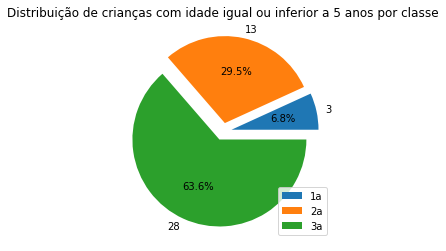

In [29]:
series_pie_plot(
    df_train.query('Age <= 5').groupby(['Pclass']).count()['Survived'], 
    labels=['1a', '2a', '3a'],
    title='Distribuição de crianças com idade igual ou inferior a 5 anos por classe'
)

### Taxa de sobrevivência entre mulheres casadas e solteiras
Conforme verificado, as mulheres obtiveram alta taxa de sobrevivência. Vamos verificar se estar casada ou não tem alguma relação com a probabilidade de sobrevivência. Para tanto, será utilizado a variável Title, onde "Mrs" (2) designa mulheres casadas e "Miss" (3), solteiras.

In [30]:
map_title = {'2': 'Mulheres Casadas', '3': 'Mulheres Solteiras'}
for title in '2', '3':
    df_groupby_title = df_train.query('Title == {}'.format(title)).groupby(['Title'])
    pct_survived = round(df_groupby_title.mean()['Survived'].max()*100, 2)
    total_survived = df_groupby_title.sum()['Survived'].max()
    total = df_groupby_title.count()['Survived'].max()
    print('{}% ({}) de um total de {} {} sobreviveram'.format(pct_survived, total_survived, total, map_title[title]))

78.7% (85) de um total de 108 Mulheres Casadas sobreviveram
72.3% (107) de um total de 148 Mulheres Solteiras sobreviveram


Considerando a análise somente pela dimensão de mulheres casadas ou solteiras, obtém-se uma diferença inconclusiva, inclusive porque o montante de mulheres solteiras que sobreviveu é superior ao montante de mulheres casadas.

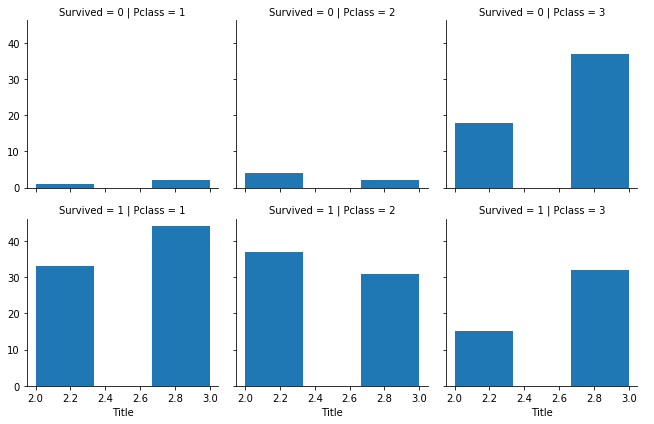

In [31]:
hist_analysis_grid(df_train.query('Title in (2, 3)'), 'Title', 'Pclass', 'Survived')

Considerando a análise de mulheres casadas e solteiras pelas dimensões Survived e Pclass, verifica-se que não se guarda nenhum traço de priorização dentre esses dois tipos quando se verifica o total de sobreviventes e não sobreviventes pelas 3 classes de passageiros. É possível identificar que há mais sobreviventes do tipo que tinha mais passageiros para cada um dos 6 histogramas acima. Logo, ser casada ou solteira parece não inferir na taxa de sobrevivência de passageiros do sexo feminino.

Porém, a análise do status civil pouco interessa se o passageiro não estiver acompanhado de sua família. Neste caso, substitui-se a variável Pclass pela variável Family.

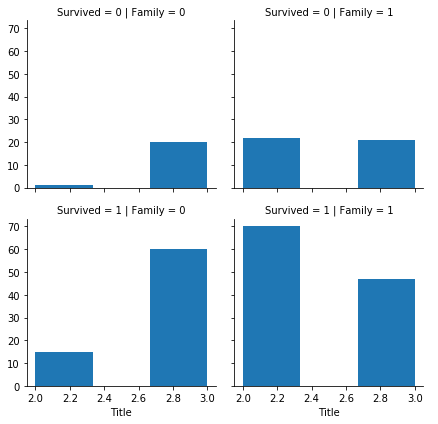

In [32]:
hist_analysis_grid(df_train.query('Title in (2, 3)'), 'Title', 'Family', 'Survived')


Nesta análise, é verificado uma contraposição à teoria levantada. No caso de mulheres solteiras, há mais sobreviventes quando não estão acompanhadas por família. Se a diferença entre casada e solteira seria a presença de família para apoiá-la ou priorizá-la (no caso de filhos), o fato de mais mulheres solteiras terem sobrevivido quando não acompanhadas de família pode ser um fator crítico para descaracterizar tal hipótese.

### Taxa de sobrevivência entre passageiros com família e sem família
Conforme verificado no caso de passageiros do sexo feminino, estar acompanhado de família não parece guardar relação com a probabilidade sobrevivência do mesmo. Porém, homens acompanhados de suas respectivas famílias parecem ter mais chances de sobreviver, conforme gráfico abaixo:

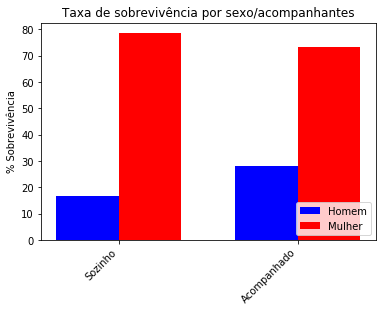

In [33]:
sex_series = { 
    'Homem': df_train.query('Sex == 0').groupby(['Family']).mean()['Survived'].values * 100,
    'Mulher': df_train.query('Sex == 1').groupby(['Family']).mean()['Survived'].values * 100
}

two_series_bar_plot(
    sex_series, 
    ['Sozinho', 'Acompanhado'], 
    title='Taxa de sobrevivência por sexo/acompanhantes',
    ylabel='% Sobrevivência'
)

Porém, essa variação pode ser dar por outra variável, como por exemplo, a classe do passageiro.

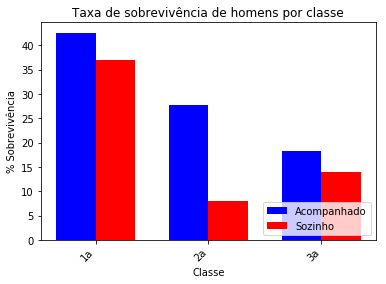

In [34]:
family_series = {
    'Acompanhado': df_train.query('Family == 1 and Sex == 0').groupby(['Pclass']).mean()['Survived'].values * 100,
    'Sozinho': df_train.query('Family == 0 and Sex == 0').groupby(['Pclass']).mean()['Survived'].values * 100
}

two_series_bar_plot(
    family_series,
    ['1a', '2a', '3a'],
    title='Taxa de sobrevivência de homens por classe',
    ylabel='% Sobrevivência',
    xlabel='Classe'
)

Aparentemente, passageiro do sexo masculino possuem maior probabilidade sobreviver se acompanhados de família. Esta relação se mantém dentre as várias classes de passageiros, e é acentuada na 2ª classe. Cabe verificar se o montante de passageiros sobreviventes é considerável.

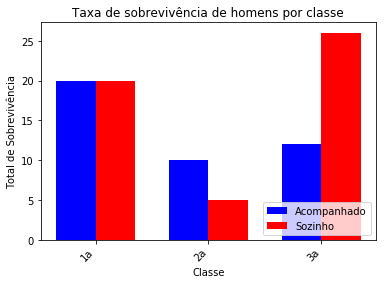

In [35]:
family_series = {
    'Acompanhado': df_train.query('Family == 1 and Sex == 0').groupby(['Pclass']).sum()['Survived'].values,
    'Sozinho': df_train.query('Family == 0 and Sex == 0').groupby(['Pclass']).sum()['Survived'].values
}

two_series_bar_plot(
    family_series,
    ['1a', '2a', '3a'],
    title='Taxa de sobrevivência de homens por classe',
    ylabel='Total de Sobrevivência',
    xlabel='Classe'
)

Quado considerado os números absolutos, percebe-se que estar acompanhado para homens fez a diferença principalmente na 3ª classe, onde a maioria estava sozinha, mas a taxa de sobrevivência foi inferior aos passageiros acompanhados. 

Porém, o motivo de existir essa relação pode ser resultado, por exemplo, da idade do passageiro, já que crianças estão acompanhadas por família, em sua grande maioria.

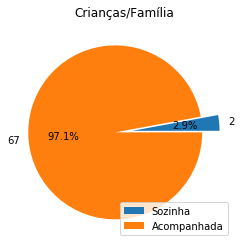

In [36]:
series_pie_plot(
    df_train.query('AgeGroup == 1').groupby(['Family']).count()['Survived'], 
    labels=['Sozinha', 'Acompanhada'],
    title='Crianças/Família'
)

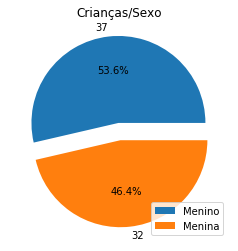

In [37]:
series_pie_plot(
    df_train.query('AgeGroup == 1').groupby(['Sex']).count()['Survived'], 
    labels=['Menino', 'Menina'],
    title='Crianças/Sexo'
)

Aparetemente, o fato de ser criança pode ter afetado o estatística de sobrevivência de homens acompanhados. Para validar a hipótese, vamos remover as crianças da análise, uma vez que, em sua grande maioria, estão acompanhadas.

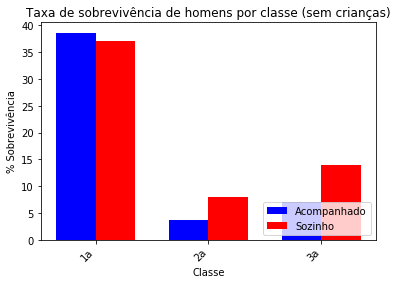

In [38]:
family_series = {
    'Acompanhado': df_train.query('Family == 1 and Sex == 0 and AgeGroup > 1').groupby(['Pclass']).mean()['Survived'].values * 100,
    'Sozinho': df_train.query('Family == 0 and Sex == 0 and AgeGroup > 1').groupby(['Pclass']).mean()['Survived'].values * 100
}

two_series_bar_plot(
    family_series,
    ['1a', '2a', '3a'],
    title='Taxa de sobrevivência de homens por classe (sem crianças)',
    ylabel='% Sobrevivência',
    xlabel='Classe'
)

E, conforme se suspeitava, ao desconsiderar crianças do conjunto de homens, a relação de sobrevivência com estar acompanhado por família se enfraqueceu fortemente, uma vez que era uma consequência da faixa etária.

### A diferença da taxa de sobrevivência entre homens e mulheres é menor na primeira classe que nas demais
É de se esperar que a taxa de sobrevivência de homens aumente da 3ª para a 1ª classe, enquanto a taxa de sobrevivência de mulheres seja mais estável, já que, uma vez que o sexo masculino foi preterido, a classe do passageiro poderá ser fator priorizador na sobrevivência. Para esta análise, serão desconsideradas as crianças, no entanto, que são parte da priorização por idade.

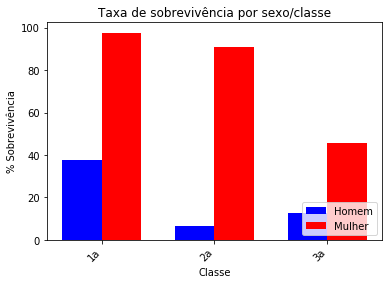

In [39]:
male_pclass_survival_rate = df_train.query('Sex == 0 and AgeGroup > 1').groupby(['Pclass']).mean()['Survived'].values
female_pclass_survival_rate = df_train.query('Sex == 1 and AgeGroup > 1').groupby(['Pclass']).mean()['Survived'].values

sex_series = { 
    'Homem': male_pclass_survival_rate * 100,
    'Mulher': female_pclass_survival_rate * 100
}

two_series_bar_plot(
    sex_series, 
    ['1a', '2a', '3a'], 
    title='Taxa de sobrevivência por sexo/classe',
    ylabel='% Sobrevivência',
    xlabel='Classe'
)

Text(0.5, 0, 'Classe')

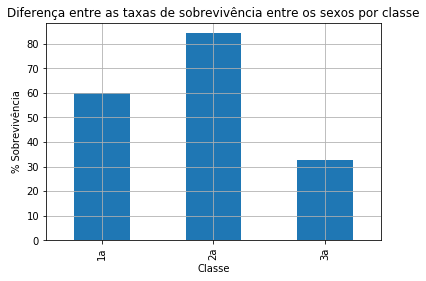

In [40]:
sex_pclass_rate_diff = (female_pclass_survival_rate - male_pclass_survival_rate) * 100
df_sex_class_rate_diff = pd.DataFrame(data={'sex_class_rate_diff': sex_pclass_rate_diff}, index=[1, 2, 3])

axes = df_sex_class_rate_diff.plot(kind='bar', grid=True, legend=False)
axes.set_xticklabels(['1a', '2a', '3a'])
axes.set_title('Diferença entre as taxas de sobrevivência entre os sexos por classe')
axes.set_ylabel('% Sobrevivência')
axes.set_xlabel('Classe')

Nota-se que, apesar de passageiros do sexo masculino da 1ª classe terem tido taxa de sobrevivência superior às demais classes, a diferença da taxa de sobrevivência dentre os dois sexos não é menor na 1ª classe. O que se pôde observar pelos dois gráficos acima foi:
- Passageiros da 1ª classe tiveram a maior taxa de sobrevivência dentre os passageiros do sexo masculino;
- Passageiros da 2ª classe tiveram a menor taxa de sobrevivência dentre os passageiros do sexo masculino;
- O pico da diferença da taxa de sobrevivência dentre os dois sexos é no grupo dos passageiros da 2ª classe. Enquanto a taxa de sobrevivência de passageiros do sexo feminino diminui pouco, a do sexo masculino diminui vertiginosamente;
- A menor diferença dentre as taxas dos dois sexos está na 3ª classe, mas porque cai também a taxa de sobrevivência de passageiros do sexo feminino.

Em resumo, a classe afeta negativamente a taxa de sobrevivência dos passageiros do sexo masculino a partir da 2ª classe, enquanto do sexo feminino, somente na 3ª classe. Assim a 3ª classe possui a menor diferença dentre os dois sexos, mas por uma queda na probabilidade de sobrevivência feminina.

### Análise da taxa de sobrevivência por porto de embarque
Em um pano rápido, considerar que o porto de embarque possa ter algo haver com a probabilidade de sobrevivência de um passageiro parece ser um equívoco. Isto porque se pode imaginar que a distribuição de embarque dentre os portos de passageiros de 1ª classe, do sexo feminino, ou crianças seja aleatória. Talvez pelo posicionamento da cabine do passageiro no navio como resultado do porto de embarque do passageiro pudesse afetar na taxa de sobrevivência. Mas não temos esse dado nas amostras.

Contudo, parece haver uma correlação negativa entre a taxa de sobrevivência e o porto de embarque, que está em ordem crescente de 0 a 2, com os respectivos valores: Cherbourg, Queenstown e Southampton.

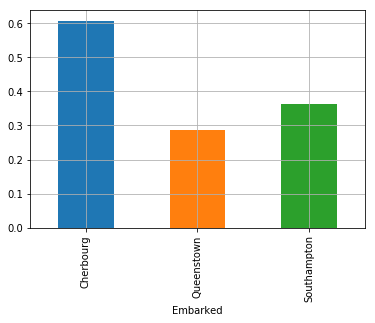

In [41]:
embarked_labels = ['Cherbourg', 'Queenstown', 'Southampton']
groupby_mean_bar_plot(df_train, ['Embarked'], 'Survived', x_labels=embarked_labels)

Será que Embarked é, por si só, uma dimensão que afeta a probabilidade de sobrevivência do passageiro?

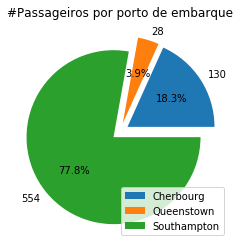

In [42]:
series_pie_plot(
    df_train.groupby(['Embarked']).count()['Survived'], 
    labels=embarked_labels,
    title='#Passageiros por porto de embarque'
)

Como o porto Queenstown teve uma quantidade pequena de passageiros, talvez a quantidade de dimensões que afete o seu índice de sobrevivência seja menor do que nos outros dois portos.

Para os outros dois portos, no entanto, cabe verificar se a diferença de percentual de sobrevivência se deve a dimensões como idade, sexo e classe.

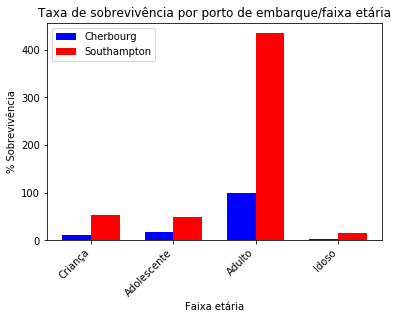

In [43]:
# Análise pela faixa etária
embarked_series = { 
    'Cherbourg': df_train.query('Embarked == 0').groupby(['AgeGroup']).count()['Survived'].values,
    'Southampton': df_train.query('Embarked == 2').groupby(['AgeGroup']).count()['Survived'].values
}

two_series_bar_plot(
    embarked_series, 
    ['Criança', 'Adolescente', 'Adulto', 'Idoso'], 
    title='Taxa de sobrevivência por porto de embarque/faixa etária',
    ylabel='% Sobrevivência',
    xlabel='Faixa etária',
    loc=2
)

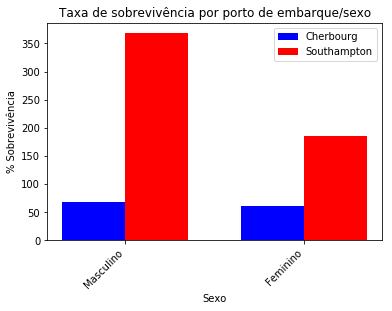

In [44]:
# Análise pelo sexo
embarked_series = { 
    'Cherbourg': df_train.query('Embarked == 0').groupby(['Sex']).count()['Survived'].values,
    'Southampton': df_train.query('Embarked == 2').groupby(['Sex']).count()['Survived'].values
}

two_series_bar_plot(
    embarked_series, 
    ['Masculino', 'Feminino'], 
    title='Taxa de sobrevivência por porto de embarque/sexo',
    ylabel='% Sobrevivência',
    xlabel='Sexo',
    loc=1
)

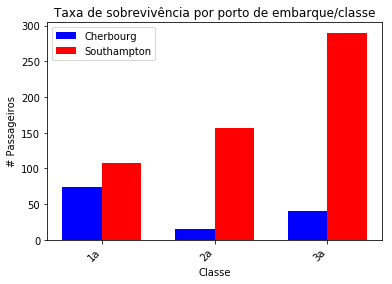

In [45]:
# Análise por classe de passageiro
embarked_series = { 
    'Cherbourg': df_train.query('Embarked == 0').groupby(['Pclass']).count()['Survived'].values,
    'Southampton': df_train.query('Embarked == 2').groupby(['Pclass']).count()['Survived'].values
}

two_series_bar_plot(
    embarked_series, 
    ['1a', '2a', '3a'], 
    title='Taxa de sobrevivência por porto de embarque/classe',
    ylabel='# Passageiros',
    xlabel='Classe',
    loc=2
)

É possível verificar pela comparação da distribuição de passageiros entre as dimensões idade, sexo e classe, que no porto Southampton embarcaram passageiros que estão em grupos menos favorecidos em maior número do que em grupos mais favorecidos, como passageiros de 3ª classe, passageiros adultos, ou passageiros do sexo masculino, enquanto, no porto de Cherbourg, a diferença entre os grupos é mais atenuada, ou mesmo, há concentração em grupos priorizados, como passageiros de 1ª classe.

Assim, pode-se suspeitar que a diferença superior a 20 pontos percentuais que existe entre as taxas de sobrevivência dos passageiros embarcados nos dois portos está relacionada com a classe, idade e sexo. 

Para avaliar a validade dessa hipótese, considerando que a relação de %Sobrevivência é Cherbourg > Southampton > Queenstown, serão considerados o percentual de passageiros embarcados em cada localidade que percente a dois grupos, *maiores %Sobrevivência* e *menores %Sobrevivência*, onde:
- maiores %Sobrevivência: crianças ou mulheres da 1ª e 2ª classe;
- menores %Sobrevivência: homens adultos da 2ª e 3ª classe.

Conforme visto anteriormente, esse dois grupos correspondem às menores taxas de sobrevivência do espaço amostral. Caso a diferença entre os percentuais justifique a diferença da taxa de sobrevivência entre os portos, será este indício que o porto de embarque não faz diferença, pois a taxa de sobrevivência é consequência de idade, sexo e classe.

In [46]:
# Referências: 
# https://www.datacamp.com/community/tutorials/pandas-multi-index

# fiz o agrupamento pela varíavel Embarked mais 3 variáveis que identificam as dimensões idade, sexo e classe
df_groups = df_train.groupby(['Embarked','AgeGroup', 'Sex', 'Pclass']).count()['Survived']

# usei a função reset_index para transformar as variáveis novamente em coluna
df_groups = df_groups.reset_index()

# Troca do nome da coluna Survived por Passengers, já que agora ela identifica o número de passageiros 
# (vide count no groupby)
df_groups.rename({'Survived': 'Passengers'}, axis=1, inplace=True)

# ordenado dataframe de maneira inversa por Passengers.
df_groups.sort_values('Passengers', ascending=False, inplace=True)
df_groups.head(10)

,Embarked,AgeGroup,Sex,Pclass,Passengers
38,2,3,0,3,170
37,2,3,0,2,73
40,2,3,1,2,55
36,2,3,0,1,52
41,2,3,1,3,49
39,2,3,1,1,36
12,0,3,1,1,34
9,0,3,0,1,31
32,2,2,0,3,24
11,0,3,0,3,20


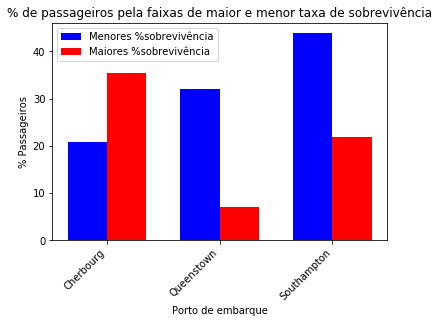

In [47]:
# filtro do grupo de menor taxa de sobrevivencia - homens adultos de 2a e 3a classe
worst_cases_filter = 'AgeGroup == 3 and Sex == 0 and Pclass in (2, 3)'
# filtro do group de maior taxa de sobrevivencia - crianças ou mulheres de 1a e 2a classe
best_cases_filter = '(AgeGroup == 1 or Sex == 1) and Pclass in (1, 2)'

worst_passengers_count = df_groups.query(worst_cases_filter).groupby(['Embarked']).sum()['Passengers'].values
best_passengers_count = df_groups.query(best_cases_filter).groupby(['Embarked']).sum()['Passengers'].values
embarked_passengers_count = df_groups.groupby(['Embarked']).sum()['Passengers'].values

worst_passengers_percent = worst_passengers_count / embarked_passengers_count * 100
best_passengers_percent = best_passengers_count / embarked_passengers_count * 100

two_series_bar_plot(
    {'Menores %sobrevivência': worst_passengers_percent, 'Maiores %sobrevivência': best_passengers_percent},
    embarked_labels,
    title='% de passageiros pela faixas de maior e menor taxa de sobrevivência',
    ylabel='% Passageiros',
    xlabel='Porto de embarque',
    loc=2
)

Diante do gráfico acima, percebe-se que em Cherbourg, onde mais de 30% dos passageiros embarcados corresponde ao grupo mais favorecido no embarque de botes e aproximadamente 20% corresponde ao grupo de menor prioridade, embarcaram passageiros com maior probabilidade de sobrevivênciam. Já nos outros dois portos, a relação é inversa e, no caso de Queenstown, a minoria dos passageiros embarcados eram prioritários, o que é indício do motivo pelo qual passageiros que embarcaram nesse porto tiveram menor chance de sobreviver.

Em resumo, a diferença na taxa de sobrevivência entre os passageiros embarcados nos 3 portos se deve por outras variáveis que não o porto de embarque. Porém, isso demonstra que o porto de embarque pode ser utilizado para uma análise demográfica de passageiros.

## Resultados

Com o intuito de atender a cada um dos 6 questionamentos feitos, foi realizada uma análise do conjunto de dados que continha 891 amostras, correspondendo a 40% do total de passageiros do incidente. Foram desconsideradas variáveis com muitos valores nulos ou que não contribuíam para a categorização dos dados, bem como foram desconsideradas amostras que continham variáveis importantes com valores nulos, como é o caso de Age (idade do passageiro) e Embarked (porto de embarque).

O trabalho de análise foi realizado em 712 amostras, dispondo somente de colunas numéricas, e a partir desses dados, foi possível verificar que:
- As chaces de sobrevivência de passageiros de 1ª classe, do sexo feminino e crianças é claramente superior às dos demais grupos
- Apesar de crianças possuírem um elevado nível de prioridade, crianças da 3ª classe tiveram menos de 50% de chance de sobreviver, o que demonstra que a classe do passageiro afeta a probabilidade de sobrevivência mesmo no caso de crianças
- No caso de passageiros do sexo feminino, estar casada ou não estar casada, não afeta na probabilidade de sobrevivência
- Passageiros que viajavam acompanhado de família não possuem mais chances de sobreviver porque estão acompanhados pela família, mas porque provavelmente são crianças, acompanhadas por familiares em sua grande maioria
- Apesar de passageiros do sexo masculino de 1ª classe terem mais chances de sobreviver que outros passageiros de mesmo sexo mas das outras duas classes, a diferença entre a taxa de sobrevivência dos dois sexos somente é menor na 1ª classe, consequência da queda da taxa de sobrevivência de passageiros do sexo feminino
- Há diferença entre as taxas de sobrevivência dos passageiros embarcados nos diferentes portos. Porém, trata-se de uma consequência da distribuição desses passageiros pelas dimensões de idade (AgeGroup), sexo (Sex) e classe (Pclass). Logo, o porto de embarque se relaciona indiretamente com a probabilidade de sobrevivência.

Cabe ratificar que a análise realizada nesse relatório não é conclusiva, e análises mais profundas deverão ser realizadas para se obter conclusões com elevado grau de certeza.

## Bibliografia

\[1\] *How to convert categorical data to numerical data?* (Stack Overflow): [https://stackoverflow.com/questions/51311831/how-to-convert-categorical-data-to-numerical-data](https://stackoverflow.com/questions/51311831/how-to-convert-categorical-data-to-numerical-data)

\[2\] *Titanic Data Science Solutions*: [https://www.kaggle.com/startupsci/titanic-data-science-solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

\[3\] *Pie Chart in Python with Legends*: [http://www.datasciencemadesimple.com/pie-chart-in-python-with-legends/](http://www.datasciencemadesimple.com/pie-chart-in-python-with-legends/)

\[4\] *Building structured multi-plot grids*: [https://seaborn.pydata.org/tutorial/axis_grids.html](https://seaborn.pydata.org/tutorial/axis_grids.html)

\[5\] *pandas 0.24.2 documentation*: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)